In [242]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [243]:
Min, Max, N = 0,0.2,201

x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]
print(h)

0.001


In [244]:
def h1(y):
    return 10.

def h2(y):
    return 0.

def h3(x):
    return 0.

def h4(x):
    return 0.

In [245]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [246]:
T = InitT()

In [247]:
T

array([[ 0., 10., 10., ..., 10., 10.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [248]:
def Relajacion(T,Nit = int(1e3), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = (T[i,j+1]+T[i,j-1]+T[i-1,j]+T[i+1,j])/4-np.exp(x[i]*y[j])*h**2


                #print(tmp1,tmp2,tmp)
                #print(tmp1,tmp2,tmp)
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                #print(r)
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        

In [249]:
T = InitT()
Tf1,_ =  Relajacion(T)
print(Tf1)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [07:05<00:00,  2.35it/s]

[[ 0.00000000e+00  1.00000000e+01  1.00000000e+01 ...  1.00000000e+01
   1.00000000e+01  0.00000000e+00]
 [ 0.00000000e+00  4.99034522e+00  6.95724365e+00 ...  6.95764201e+00
   4.99055391e+00  0.00000000e+00]
 [ 0.00000000e+00  3.00421866e+00  4.96154231e+00 ...  4.96233487e+00
   3.00463385e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.48014937e-05 -2.68224682e-05 ... -2.78966019e-05
  -1.53971200e-05  0.00000000e+00]
 [ 0.00000000e+00 -8.39983722e-06 -1.48047227e-05 ... -1.53971200e-05
  -8.73765593e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


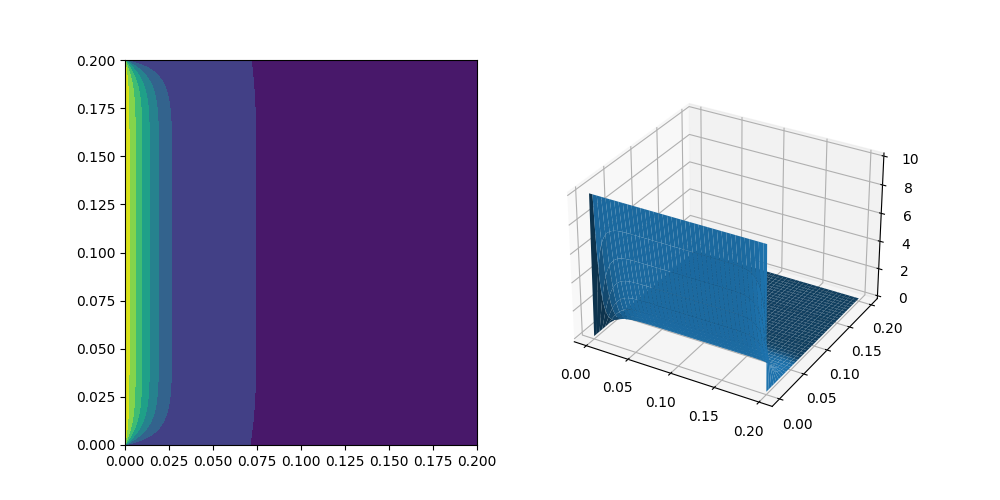

In [250]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X, Y = np.meshgrid(x, y)

c = ax.contourf(X, Y, Tf1.T)

# Use ax1 for 3D plotting
ax1.plot_surface(X.T, Y.T, Tf1.T)

plt.show()
